## AFL Season Analysis

Analysing my predicted ladders throughout the season.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import networkx as nx
import numpy as np

In [3]:
df = pd.read_csv('/Users/Yuval/Desktop/Predicted Ladder.csv')

In [4]:
df

,Ladder \ Week,0 - no tools,0 - Squiggle,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Final Ladder
0,1,Melbourne,Melbourne,Brisbane Lions,Melbourne,Melbourne,Melbourne,Melbourne,Brisbane Lions,Melbourne,...,Geelong,Melbourne,Geelong,Geelong,Geelong,Geelong,Geelong,Geelong,Geelong,Geelong
1,2,Western Bulldogs,Brisbane Lions,Melbourne,Geelong,Brisbane Lions,Geelong,Brisbane Lions,Melbourne,Brisbane Lions,...,Brisbane Lions,Geelong,Brisbane Lions,Fremantle,Sydney,Sydney,Melbourne,Sydney,Sydney,Melbourne
2,3,Brisbane Lions,Richmond,Geelong,Brisbane Lions,Geelong,Brisbane Lions,Geelong,Geelong,Richmond,...,Melbourne,Brisbane Lions,Richmond,Sydney,Brisbane Lions,Brisbane Lions,Sydney,Brisbane Lions,Melbourne,Sydney
3,4,Richmond,Western Bulldogs,Sydney,Sydney,Western Bulldogs,Sydney,Sydney,Fremantle,Carlton,...,Fremantle,Richmond,Melbourne,Melbourne,Melbourne,Fremantle,Brisbane Lions,Collingwood,Fremantle,Collingwood
4,5,Port Adelaide,Port Adelaide,Western Bulldogs,Western Bulldogs,Sydney,St Kilda,Western Bulldogs,Richmond,Sydney,...,Richmond,Sydney,Fremantle,Brisbane Lions,Fremantle,Melbourne,Fremantle,Fremantle,Brisbane Lions,Fremantle
5,6,Geelong,Sydney,Carlton,Carlton,St Kilda,Western Bulldogs,Fremantle,Sydney,St Kilda,...,Sydney,Carlton,Sydney,Richmond,Richmond,Collingwood,Collingwood,Melbourne,Collingwood,Brisbane Lions
6,7,Sydney,Geelong,Collingwood,Richmond,Fremantle,Fremantle,St Kilda,Port Adelaide,Port Adelaide,...,Western Bulldogs,Western Bulldogs,Western Bulldogs,Carlton,Carlton,Western Bulldogs,Western Bulldogs,Richmond,Richmond,Richmond
7,8,Fremantle,GWS,Richmond,Fremantle,Richmond,Richmond,Richmond,St Kilda,Geelong,...,Carlton,Fremantle,Carlton,Western Bulldogs,Western Bulldogs,Carlton,Carlton,Western Bulldogs,Carlton,Western Bulldogs
8,9,Carlton,Essendon,Fremantle,St Kilda,Carlton,Carlton,Port Adelaide,Western Bulldogs,Fremantle,...,Gold Coast,Collingwood,Collingwood,Port Adelaide,Collingwood,Richmond,Richmond,Carlton,Western Bulldogs,Carlton
9,10,GWS,Fremantle,GWS,GWS,GWS,Port Adelaide,Carlton,Carlton,Western Bulldogs,...,Collingwood,Gold Coast,St Kilda,Gold Coast,Gold Coast,St Kilda,Port Adelaide,St Kilda,St Kilda,St Kilda


In [24]:
teams = ['Adelaide', 'Brisbane Lions','Carlton','Collingwood','Essendon','Fremantle','Geelong','Gold Coast','GWS',
         'Hawthorn','Melbourne','North Melbourne','Port Adelaide','Richmond','St Kilda','Sydney',
         'West Coast','Western Bulldogs']

In [6]:
len(teams)

18

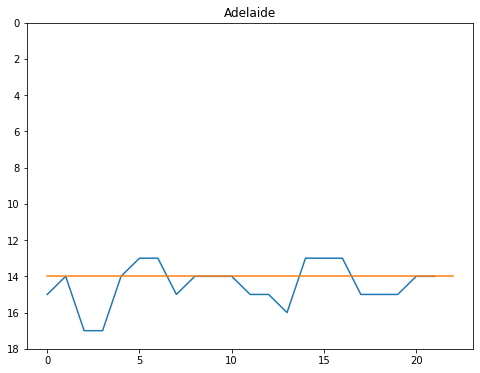

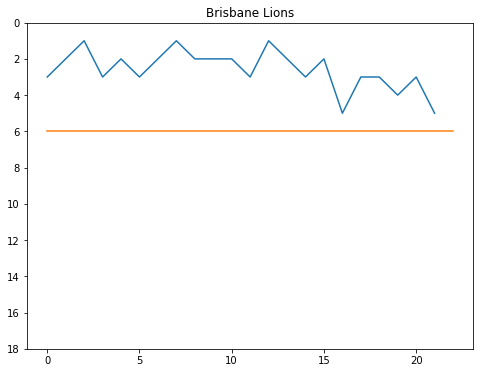

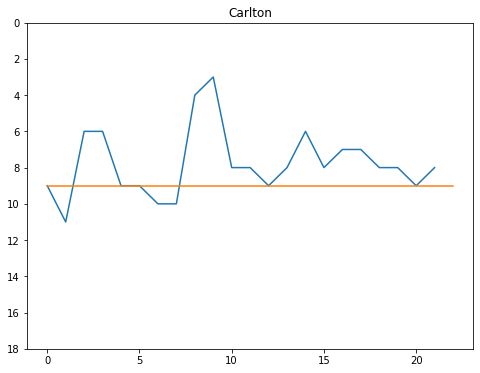

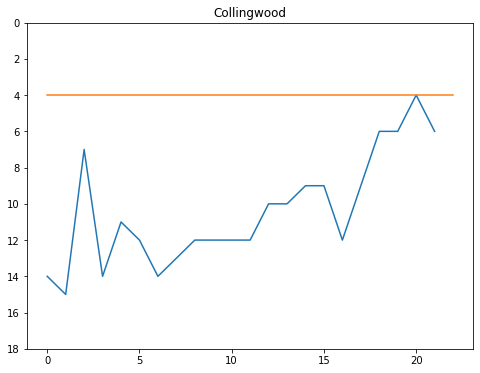

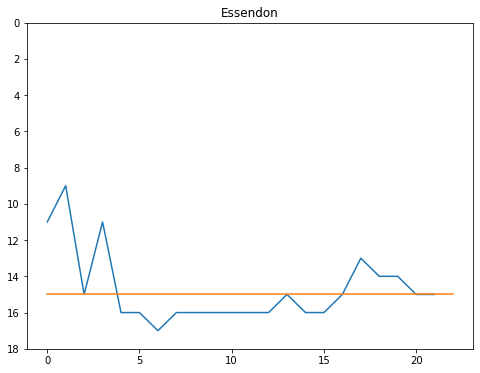

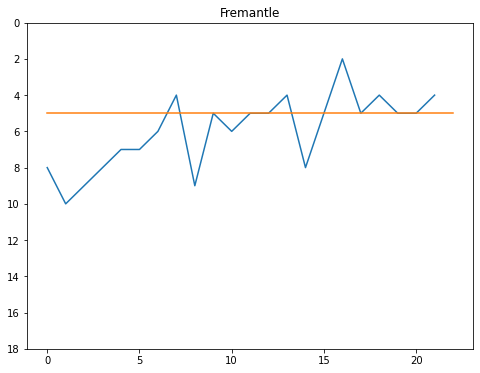

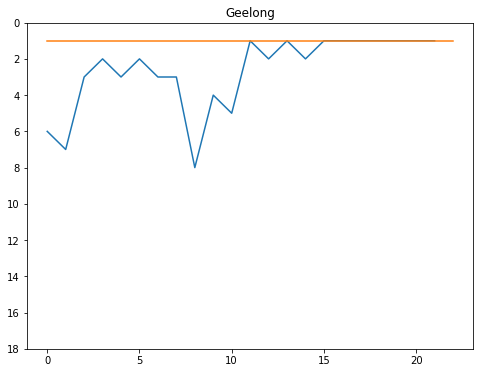

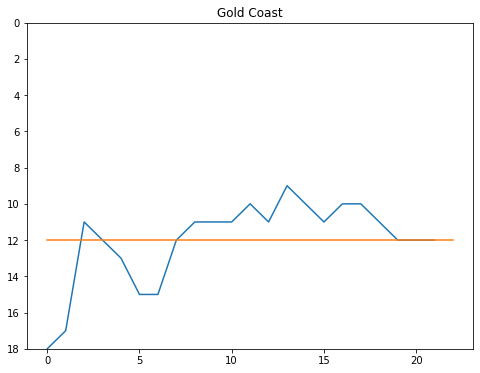

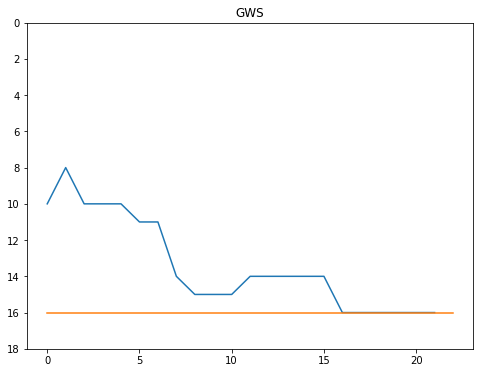

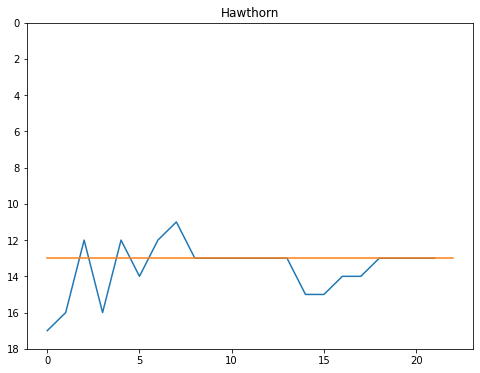

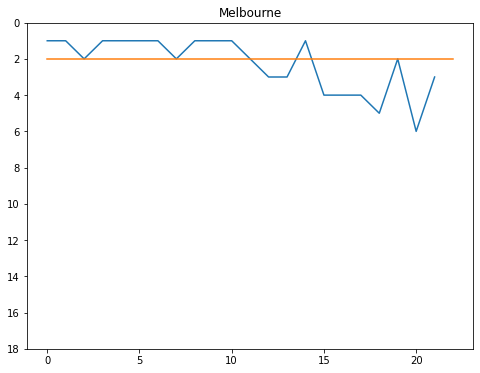

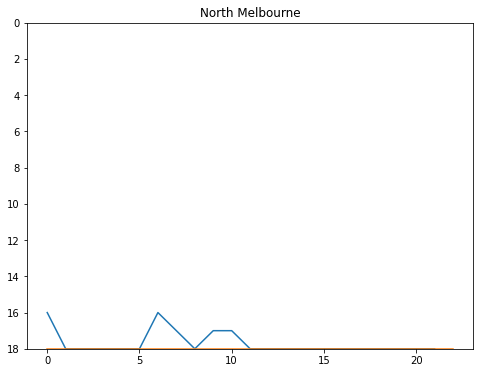

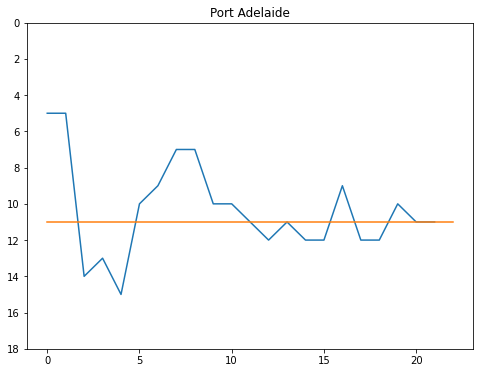

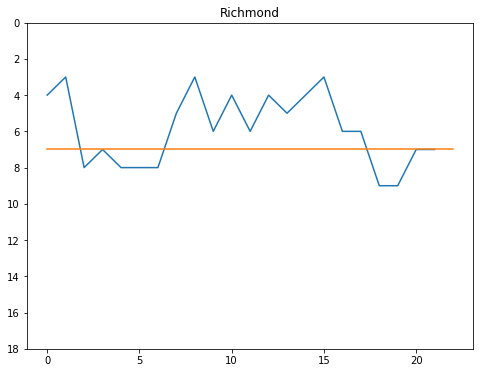

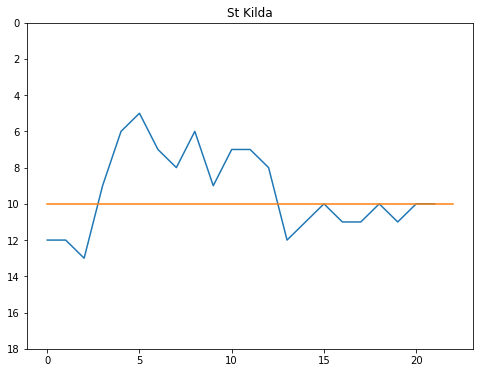

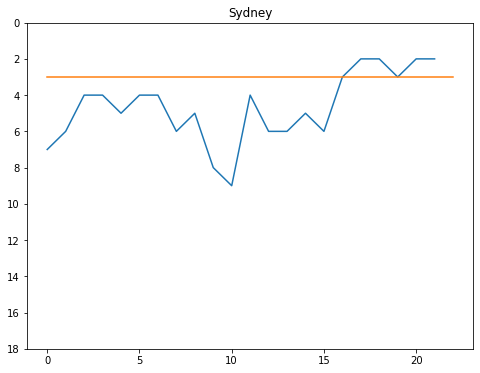

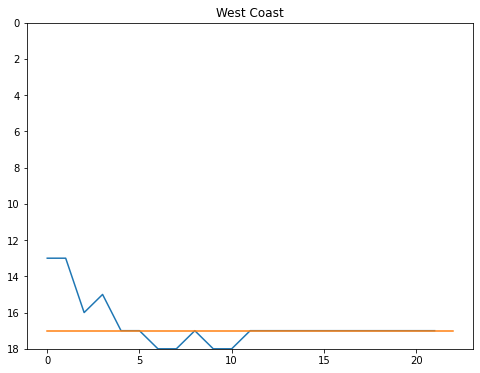

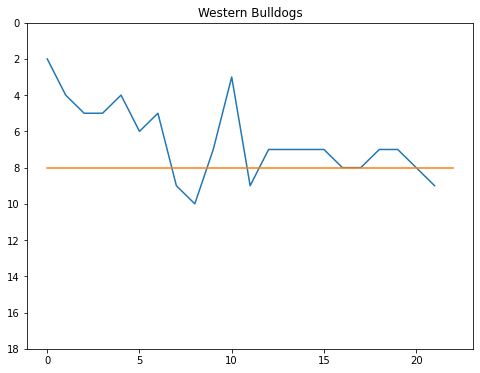

In [7]:
for team in teams:
    lad = []
    for i in range(22):
        lad.append(list(df.iloc[:,1+i]).index(team)+1)
    plt.figure(figsize = (8,6))
    plt.title(team)
    plt.plot(lad)
    plt.ylim(18,0)
    plt.plot((0,22),(list(df.iloc[:,-1]).index(team)+1,list(df.iloc[:,-1]).index(team)+1))

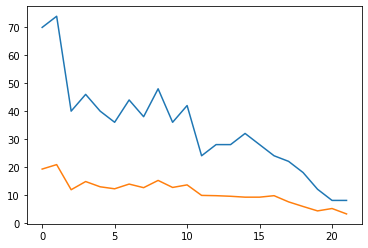

In [8]:
# Ladder accuracy
# AE - Absolute Error - rungs I was out by
# MSE - Mean Square Error
ae = []
mse = []
for i in range(22):
    ae_round = []
    mse_round = []
    for team in teams:
        ae_round.append(abs((list(df.iloc[:,1+i]).index(team)+1)-(list(df.iloc[:,-1]).index(team)+1)))
        mse_round.append(((list(df.iloc[:,1+i]).index(team)+1)-(list(df.iloc[:,-1]).index(team)+1))**2)
    ae.append(sum(ae_round))
    mse.append(math.sqrt(sum(mse_round)))
plt.plot(ae)
plt.plot(mse)

In [9]:
ae[10]

42

In [10]:
ae[2]

40

In [11]:
mse[2]

11.832159566199232

In [12]:
mse[10]

13.564659966250536

In [13]:
mse[11]

9.797958971132712

In [14]:
# Toughest Draw

In [81]:
df = pd.read_csv('/Users/Yuval/Desktop/2022fixture.csv')

In [82]:
vs = []
allgames = list(df['Team'])
for i in range(int(len(allgames)/2)):
    vs.append([allgames[2*i],allgames[2*i+1]])

In [83]:
teams = ['Adelaide', 'Brisbane Lions','Carlton','Collingwood','Essendon','Fremantle','Geelong','Gold Coast',
         'Greater Western Sydney','Hawthorn','Melbourne','North Melbourne','Port Adelaide','Richmond','St Kilda',
         'Sydney', 'West Coast','Western Bulldogs']

In [92]:
ladder = {'Geelong':144.2,
          'Melbourne':130.5,
          'Sydney':127.9,
          'Collingwood':104.3,
          'Fremantle':117,
          'Brisbane Lions':119.3,
         'Richmond':121.6,
         'Western Bulldogs':108.9,
         'Carlton':108.3,
         'St Kilda':99.3,
         'Port Adelaide':110.3,
         'Gold Coast':102.8,
         'Hawthorn':89.8,
         'Adelaide':86.7,
         'Essendon':83.2,
         'Greater Western Sydney':84.6,
         'West Coast':59.8,
         'North Melbourne':55.8}

In [99]:
diff = {}
for team in teams:
    opponents = []
    for game in vs:
        if team in game:
            ind = game.index(team)
            opponents.append(game[(ind+1)%2])
    opp = []
    for t in teams:
        if t != team:
            opp.append(t)
    for o in opp:
        opponents.remove(o)
    
    percent = []
    for opposition in opponents:
        percent.append(ladder[opposition])
    
    diff[team] = round(np.mean(percent),1)

In [112]:
sortedd = list(dict(sorted(diff.items(), key=lambda item: item[1],reverse = True)).items())
for i in range(18):
    print(f'{i+1:2}. {sortedd[i][0]:22} {sortedd[i][1]:5} %')

 1. St Kilda               119.6 %
 2. Essendon               116.7 %
 3. Greater Western Sydney 116.3 %
 4. Western Bulldogs       115.4 %
 5. West Coast             114.5 %
 6. Port Adelaide          113.2 %
 7. Melbourne              112.0 %
 8. North Melbourne        110.3 %
 9. Carlton                102.8 %
10. Collingwood            102.3 %
11. Brisbane Lions         100.1 %
12. Hawthorn                97.7 %
13. Fremantle               96.5 %
14. Richmond                90.3 %
15. Adelaide                87.7 %
16. Geelong                 86.8 %
17. Sydney                  86.4 %
18. Gold Coast              85.8 %
